In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [20]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [22]:
hb=df[df['Position'] == 'HB']
hbcorr = hb.corr()
print(hbcorr)

                      Unnamed: 0  Acceleration   Agility  Awareness  \
Unnamed: 0              1.000000     -0.212467 -0.211584  -0.197510   
Acceleration           -0.212467      1.000000  0.496638   0.016170   
Agility                -0.211584      0.496638  1.000000   0.202667   
Awareness              -0.197510      0.016170  0.202667   1.000000   
Ball Carrier Vision    -0.170400     -0.095916  0.237645   0.725484   
Block Shedding         -0.041084     -0.007403 -0.016955   0.058445   
Carrying               -0.082520     -0.244162 -0.207668   0.433466   
Catch In Traffic       -0.047687      0.167979  0.338291   0.320079   
Catching                0.163394      0.153915  0.380773   0.278392   
Elusiveness            -0.315684      0.419146  0.708492   0.271420   
Finesse Moves           0.032761      0.118841  0.091200   0.074042   
Hit Power              -0.044495     -0.041981 -0.116725  -0.033730   
Impact Blocking         0.034356     -0.316056 -0.351022   0.000790   
Injury

In [23]:
##In this workbook, we will be working with the halfback  Position
hb=df[df['Position'] == 'HB']
hbcorr = hb.corr()
hbpos = hbcorr[hbcorr['Overall Rating'] >= 0.5]
hbneg = hbcorr[hbcorr['Overall Rating'] <= -0.5]
print(hbpos['Overall Rating'], hbneg['Overall Rating'])
#Here are the significant correlations for the halfback position

Awareness              0.880898
Ball Carrier Vision    0.823911
Carrying               0.550456
Juke Move              0.532928
Overall Rating         1.000000
Route Running          0.501600
Name: Overall Rating, dtype: float64 Series([], Name: Overall Rating, dtype: float64)


In [25]:
hbsig = hb[['Awareness', 'Ball Carrier Vision', 'Carrying', 'Juke Move', 'Route Running']]
X = add_constant(hbsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#It looks like all of our vif scores are below 5 so we can move on to statistial summary testing

const                  405.913003
Awareness                2.374743
Ball Carrier Vision      2.669936
Carrying                 1.574383
Juke Move                1.572938
Route Running            1.371876
dtype: float64

In [27]:
HB = sm.OLS(hb['Overall Rating'], hbsig).fit()
print(HB.summary())
#It looks like all of our variables are significant 
#Based on skewness, it looks like a normal distribution

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.459e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        11:40:31   Log-Likelihood:                -651.67
No. Observations:                 287   AIC:                             1313.
Df Residuals:                     282   BIC:                             1332.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Awareness               0.3006    

In [28]:
def model():
    pv=0.3006*hb['Awareness']+ 0.1947*hb['Ball Carrier Vision']+ 0.2123*hb['Carrying']+ 0.1995*hb['Juke Move']+ 0.0526* hb['Route Running']
    return pv

In [30]:
hb['Predicted Value'] = model()
hb['Residual'] = hb['Predicted Value'] - hb['Overall Rating'] 

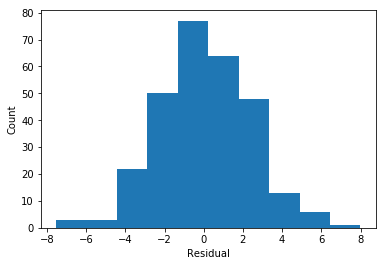

In [32]:
plt.hist(hb['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

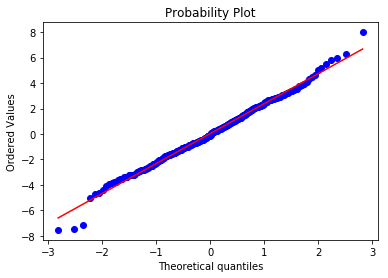

In [34]:
stats.probplot(hb['Residual'], plot=plt)
plt.show()
#There does not appear to be any outliers in the residuals

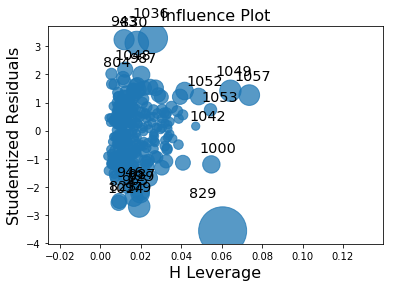

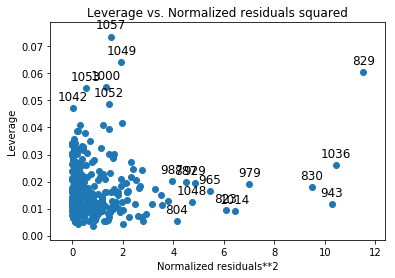

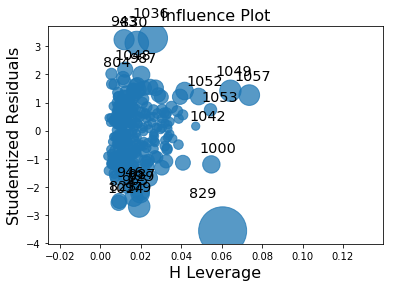

In [36]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(HB)
influence_plot(HB)
#It looks like we will need to remove point 829 and retest the model

In [38]:
hbul = hb.drop(df.index[829])
hbulsig = hbul[['Awareness', 'Ball Carrier Vision', 'Carrying', 'Juke Move', 'Route Running']]
HB2 = sm.OLS(hbul['Overall Rating'], hbulsig).fit()
print(HB2.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.674e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        11:49:46   Log-Likelihood:                -643.60
No. Observations:                 286   AIC:                             1297.
Df Residuals:                     281   BIC:                             1315.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Awareness               0.2959    

In [39]:
def model():
    pv=0.2959*hb['Awareness']+ 0.2176*hb['Ball Carrier Vision']+ 0.1988*hb['Carrying']+ 0.1989*hb['Juke Move']+ 0.0464* hb['Route Running']
    return pv

In [ ]:
hbul['Predicted Value'] = model()
hbul['Residual'] = hbul['Predicted Value'] - hbul['Overall Rating']

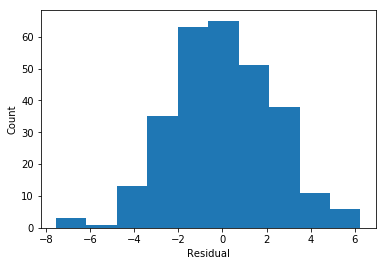

In [40]:
plt.hist(hbul['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

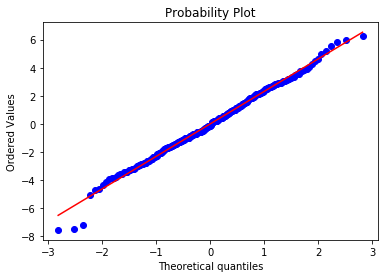

In [42]:
stats.probplot(hbul['Residual'], plot=plt)
plt.show()
#The residuals look pretty evevenly distributed but there might be 3 outliers in the bottom left corner.  We will check 
# amd see how much leverage they have before removing them though

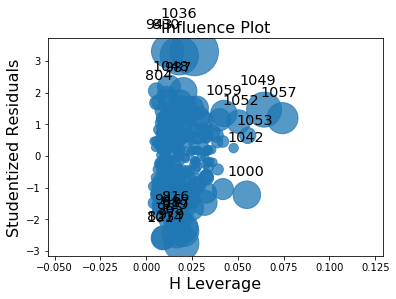

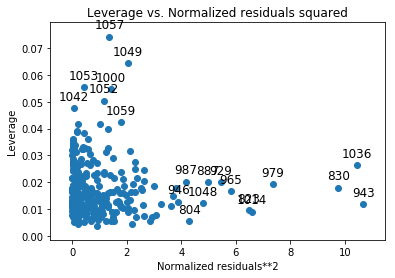

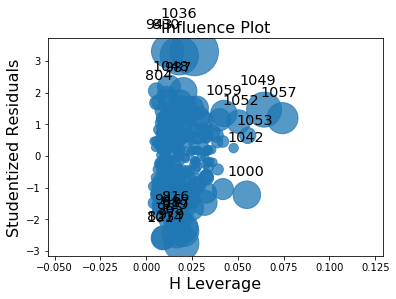

In [44]:
plot_leverage_resid2(HB2)
influence_plot(HB2)
#It doesn't look like the outliers have a high amount of leverage so we will keep them in the model

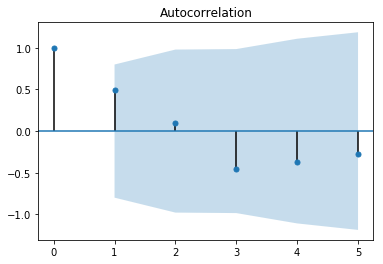

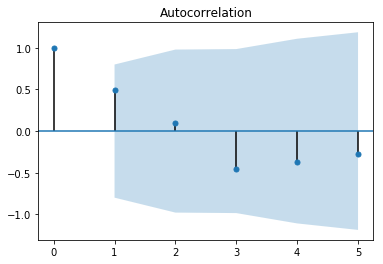

In [45]:
hbcorr1 = hbul[['Overall Rating', 'Awareness', 'Ball Carrier Vision', 'Carrying', 'Juke Move', 'Route Running']].corr()
plot_acf(hbcorr1['Overall Rating'])
#there does not appear to be any autocorrelation looking at the plot below
#There is also a Durbin-Watson correlation of 1.912, which indicates no significant autocoreelation

In [46]:
#Finally, we check for homoskedasticity
het_breuschpagan(hbul['Residual'], hbulsig)
#Due to the low p-values, we can reject the null that there is homoskedasticity in the data

(90.32885490243196,
 1.1211038223080237e-18,
 25.94394611931859,
 1.5953533790363754e-21)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(hbulsig, hbul['Overall Rating'], test_size = 0.3, random_state =42)
reg=LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
hbcv = cross_val_score(reg, hbulsig, hbul['Overall Rating'], cv=5)
hbcv_mean = np.mean(hbcv)
print(hbcv, hbcv_mean)
#it looks like the model explained 88.47% of the variation in the model

[0.93111553 0.9251157  0.91138365 0.78344903 0.87246589] 0.8847059590370405


In [50]:
hbclean2 = hbul[['Overall Rating','Awareness', 'Ball Carrier Vision', 'Carrying', 'Juke Move', 'Route Running']]
hbdescribe = hbclean2.describe()

In [51]:
hbdescribe.to_csv('C:\\Users\\tilleymusprime\\Desktop\\hbsig.csv')